In [18]:
#################################################step-1 Import Data############################################################
import pandas as pd
mydata=pd.read_csv('Income_Expense_Data.csv')

In [19]:
#checking size of data
mydata.shape

(14, 3)

In [20]:
#checking first few records
mydata.head(10)

,Age,Income,Expense
0,25,40000.0,20000
1,26,35000.0,18000
2,27,90000.0,60000
3,32,70000.0,28000
4,31,75000.0,32000
5,30,71000.0,30000
6,47,NaN,25000
7,125,76000.0,30000
8,49,56000.0,16000
9,55,67000.0,20000


In [21]:
###############################################step-2 Data Cleaning############################################################
#check for missing values
mydata.isnull().sum()


Age        0
Income     1
Expense    0
dtype: int64

In [22]:
#Treating null value - Replacing Null Value with median
mydata['Income'].fillna((mydata['Income'].median()),inplace=True)

In [23]:
#check for missing values again
mydata.isnull().sum()

Age        0
Income     0
Expense    0
dtype: int64

In [16]:
#checking for outliers
mydata.describe() #notice the maximum value in age

,Age,Income,Expense
count,14.000000,14.000000,14.000000
mean,48.500000,65357.142857,25285.714286
std,25.928155,17032.128657,11795.883059
min,25.000000,35000.000000,11000.000000
25%,30.250000,56000.000000,18500.000000
50%,48.000000,70000.000000,24500.000000
75%,55.750000,75750.000000,29500.000000
max,125.000000,90000.000000,60000.000000


In [17]:
#checking different percentiles
pd.DataFrame(mydata['Age']).describe(percentiles=(1,0.99,0.9,0.75,0.5,0.3,0.1,0.01))

,Age
count,14.000000
mean,48.500000
std,25.928155
min,25.000000
1%,25.130000
10%,26.300000
30%,30.900000
50%,48.000000
75%,55.750000
90%,61.400000


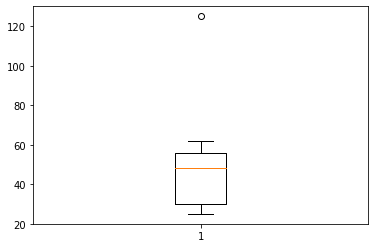

In [4]:
#checking boxplot for Age column
from matplotlib import pyplot as plt
plt.boxplot(mydata['Age'])
plt.show()

In [43]:
#Checking Outliers by definition and treating Outliers

#getting median age
age_col_df=pd.DataFrame(mydata['Age'])
age_median=age_col_df.median()

#getting IQR of Age Column - IQR-Inter Quartile Range
q3=age_col_df.quantile(q=0.75)
q1=age_col_df.quantile(q=0.25)
IQR=q3-q1

#Deriving Boundaries of Outliers
IQR_LL=int(q1 - 1.5*IQR)
IQR_UL=int(q3 + 1.5*IQR)

#Finding and treating Outliers - both lower and upper hand
mydata.loc[mydata['Age']>IQR_UL, 'Age']=int(age_col_df.quantile(q=0.99))
mydata.loc[mydata['Age']<IQR_LL, 'Age']=int(age_col_df.quantile(q=0.01))

In [44]:
#Check max age value now
max(mydata['Age'])

116

Text(0, 0.5, 'Expense')

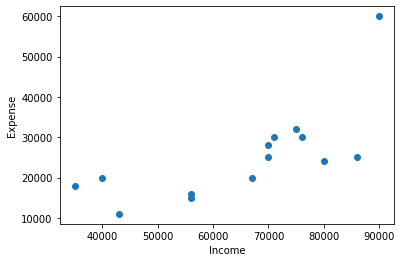

In [45]:
#################################step-3 Exploratory Data Analysis############################################################
#check how expense is varying with income
x=mydata['Income']
y=mydata['Expense']
plt.scatter(x,y,label='Income Expense')
plt.xlabel('Income')
plt.ylabel('Expense')

Text(0, 0.5, 'Expense')

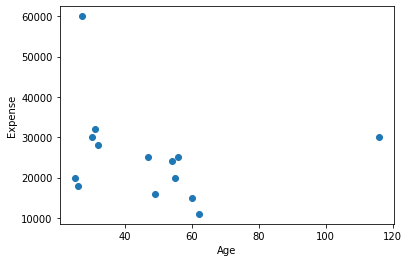

In [46]:
#check how expense is varying with age
x=mydata['Age']
y=mydata['Expense']
plt.scatter(x,y,label='Income Age')
plt.xlabel('Age')
plt.ylabel('Expense')

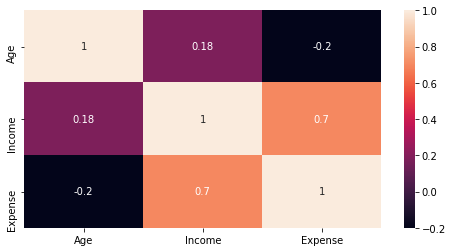

In [47]:
#check co-relation matrix - to check the strength of variation between two variables
import seaborn as sns
correlation_matrix=mydata.corr().round(2)
f,ax=plt.subplots(figsize=(8,4))
sns.heatmap(data=correlation_matrix,annot=True)

## Feature Engineering?
### Its playing around with features to achieve below goals
### Preparing the proper input dataset, compatible with the ml algorithm requirements
### Improving the performance of machine learning models

In [48]:
#################################step-4 Feature Engineering ############################################################
#Normalization/Scaling of data - understanding scaling -one of the technique
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(mydata)
scaled_data

array([[0.        , 0.09090909, 0.18367347],
       [0.01098901, 0.        , 0.14285714],
       [0.02197802, 1.        , 1.        ],
       [0.07692308, 0.63636364, 0.34693878],
       [0.06593407, 0.72727273, 0.42857143],
       [0.05494505, 0.65454545, 0.3877551 ],
       [0.24175824, 0.63636364, 0.28571429],
       [1.        , 0.74545455, 0.3877551 ],
       [0.26373626, 0.38181818, 0.10204082],
       [0.32967033, 0.58181818, 0.18367347],
       [0.31868132, 0.81818182, 0.26530612],
       [0.34065934, 0.92727273, 0.28571429],
       [0.38461538, 0.38181818, 0.08163265],
       [0.40659341, 0.14545455, 0.        ]])

In [49]:
#converting data back to Pandas Dataframe
mydata_scaled=pd.DataFrame(scaled_data)
mydata_scaled.columns=['Age','Income','Expense']

In [50]:
#Seperating Features and Response
features=['Income','Age']
response=['Expense']
X=mydata_scaled[features]
Y=mydata_scaled[response]

In [51]:
X

,Income,Age
0,0.090909,0.000000
1,0.000000,0.010989
2,1.000000,0.021978
3,0.636364,0.076923
4,0.727273,0.065934
5,0.654545,0.054945
6,0.636364,0.241758
7,0.745455,1.000000
8,0.381818,0.263736
9,0.581818,0.329670


In [52]:
#Dividing data into test and train
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

#importing necessary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [53]:
#Fitting Linear Regression Model
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
#Checking accuracy on test data
accuracy=model.score(X_test,Y_test)
print(accuracy*100,'%')

67.82333705931674 %


In [55]:
X_test #the test data-predictors

,Income,Age
8,0.381818,0.263736
6,0.636364,0.241758
4,0.727273,0.065934


In [56]:
Y_test #the actual values in the test data - target column

,Expense
8,0.102041
6,0.285714
4,0.428571


In [57]:
model.predict(X_test) #predicting values on the test data

array([[0.20244557],
       [0.35979061],
       [0.4694941 ]])

In [58]:
model.intercept_ #checking the intercept of model equation

array([0.06094365])

In [59]:
model.coef_ #checking the coefficients of model equation

array([[ 0.59063665, -0.31855265]])

In [63]:
#Creating the model equation - manually
#Expense=(0.58634062*Income -0.29888113*Age) + 0.05325671

#Substituting one value and matching result - manually
Expense=(0.59063665*0.381818 -0.31855265*0.263736) + 0.06094365 = 0.20244555272929998

#Substituting original value and matching result - manually
#Expense=(0.58634062*0.381818 -0.29888113*0.24) + 0.05325671 = 15000 approx

In [64]:
Expense #predicted value

0.20244555272929998